In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


import utils

In [2]:
sns.set_theme("notebook")

In [3]:
path = "../../data/"
data_start = pd.read_csv(path + 'train_events.csv')
video_start = pd.read_csv(path + 'video_info_v2.csv')
targets_start = pd.read_csv(path + 'train_targets.csv')

In [4]:
data_start.head(5)

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976


In [5]:
from utils import Imputer, MainFeatureExtractor

events, features = Imputer().fit_transform(data_start, video_start, targets_start)

In [6]:
events.head()

,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,local_time,title,category,duration,author_id,duration_sec
0,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,133074,10067243,2024-06-01 08:40:58+00:00,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456534,1009219,2456
1,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,362960,10245341,2024-06-01 21:33:24+00:00,Comedy Club: Мальдивы | Андрей Бебуришвили,Юмор,519211,1006760,519
2,St.-Petersburg,desktop,browser,Windows,Chrome,5647,96775,10894333,2024-06-01 21:30:43+00:00,"Новая Битва экстрасенсов, 24 сезон, 11 выпуск",Телепередачи,5518280,1009257,5518
3,Moscow,smartphone,mobile app,Android,Rutube,1521,161610,10029092,2024-06-01 23:03:42+00:00,Сергей Орлов-снял дом!!!,Разное,1522069,1058671,1522
4,Moscow,smartphone,mobile app,Android,Rutube,71,116245,10452976,2024-06-01 22:48:09+00:00,Ищем сокровища в Полевском | Уральская Флоренц...,Путешествия,1249920,1020020,1249


In [7]:
features.head()

,viewer_uid,age,sex,age_class
0,10087154,30,0,1
1,10908708,25,1,1
2,10190464,34,0,2
3,10939673,25,0,1
4,10288257,48,0,3


In [8]:
events, features = MainFeatureExtractor().fit_transform(events, features)

In [9]:
features.head()

,viewer_uid,favourite_cat,percent_fav_cat,embeds_0,embeds_1,embeds_2,embeds_3,embeds_4,embeds_5,embeds_6,...,embeds_25,embeds_26,embeds_27,embeds_28,embeds_29,embeds_30,embeds_31,age,sex,age_class
0,10000001,Телепередачи,1.000000,-12.513889,7.161385,-1.921415,-2.510002,-2.536459,3.872850,1.688143,...,0.296535,2.228844,-0.781238,0.979583,0.499716,-0.831642,2.697985,40,1,2
1,10000002,Сериалы,0.777778,-8.857679,7.798440,-0.388398,-2.044650,1.806627,-0.580760,-2.159648,...,-0.896826,-2.626723,1.500267,-1.236043,-1.899359,1.300126,0.106583,44,0,3
2,10000004,Наука,0.333333,0.684283,-0.659586,-3.842297,2.629033,0.829981,-2.002862,0.163314,...,-0.343905,-0.277934,-0.358481,-0.651661,-1.051867,-0.105431,-1.498083,36,0,2
3,10000005,Технологии и интернет,1.000000,2.962347,-1.101059,-1.526201,-1.449923,-0.182694,-1.361750,-0.151736,...,-0.393002,0.410601,-0.895560,-1.239015,-0.741628,-0.058947,-1.069365,38,0,2
4,10000006,Аниме,1.000000,-3.673235,0.747184,-0.086243,-0.816762,-0.109268,0.662777,-0.299665,...,-0.001740,0.563425,-1.091279,0.212252,2.557632,0.318442,-0.514779,38,0,2


In [10]:
# imputer = utils.Imputer()
# 
# df_with_localtime = utils.add_tz_and_localtime_column(data)
# df_with_localtime.head()

## График по датам

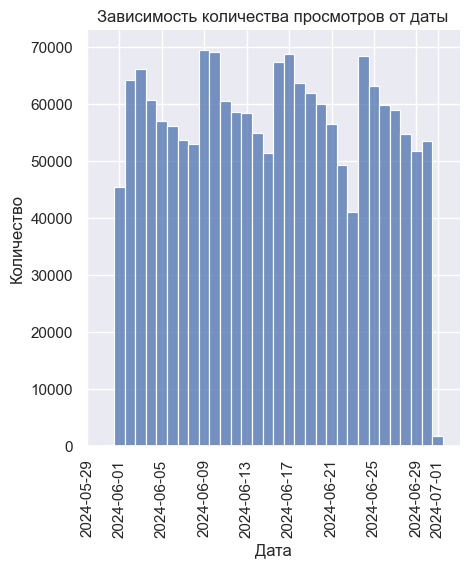

In [14]:
fig = sns.displot(events["local_time"].dt.date)
plt.title('Зависимость количества просмотров от даты')
fig.ax.tick_params(axis='x', labelrotation=90)
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

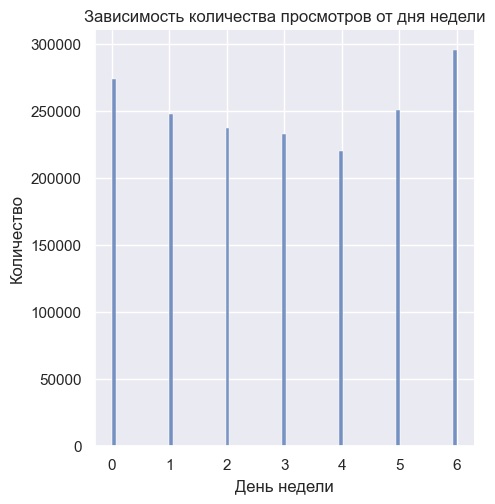

In [15]:
fig = sns.displot(events["local_time"].dt.day_of_week)
plt.title('Зависимость количества просмотров от дня недели')
plt.xlabel('День недели')
plt.ylabel('Количество')
plt.show()